# IMAGE PREPROCESSING (IMAGE TRANSFORMATIONS AND FEATURE SELECTION)
Transformations:
a. Normalization (resize images to 512x512) 
Apply a Gaussian filter to the image to remove noise



Feature Selection:
a. Apply Cannny Edge Detection to the image

In [1]:
# IMPORT LIBRARIES
import os
import cv2 as cv
import matplotlib.pyplot as plt

## IMAGE TRANSFORMATIONS AND FEATURE SELECTION (TESTING)

Text(0.5, 1.0, 'Normal')

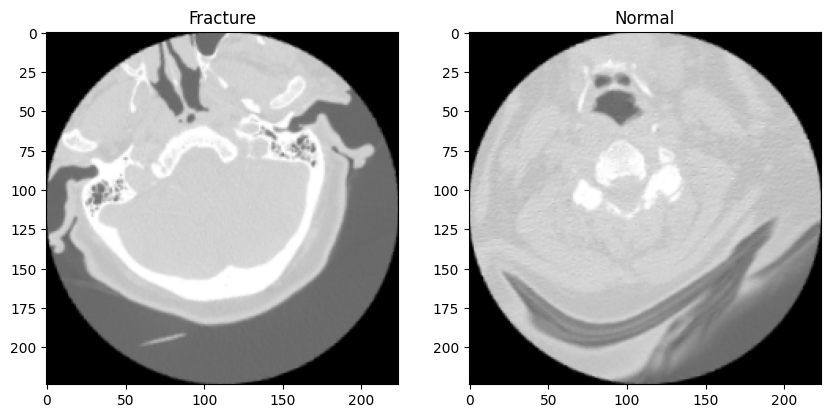

In [2]:
# TEST IMAGES

# Test image (frac)
test_frac = cv.imread("./CF_copy/train/fracture/train_frac_0.png")

# Test image (norm)
test_norm = cv.imread("./CF_copy/train/normal/train_norm_0.png")

# PLOT IMAGES (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(test_frac)
ax[0].set_title("Fracture")
ax[1].imshow(test_norm)
ax[1].set_title("Normal")


Text(0.5, 1.0, 'Normal')

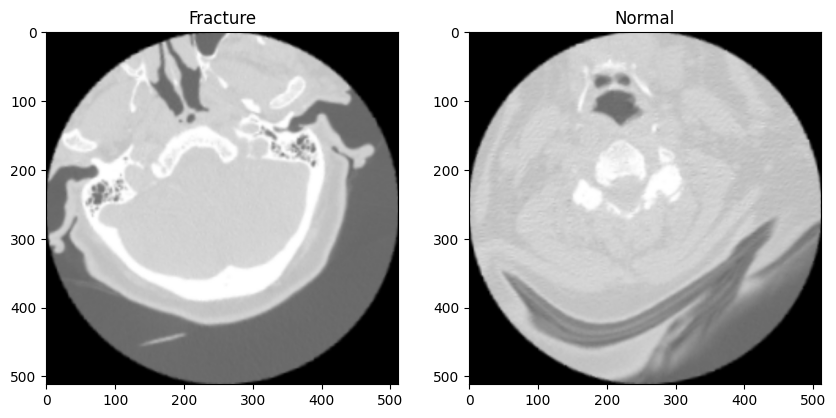

In [3]:
# Resize images

# Resize fracture image
if test_frac.shape[0] < 512:
    test_frac = cv.resize(test_frac, (512, 512))

# Resize normal image
if test_norm.shape[0] < 512:
    test_norm = cv.resize(test_norm, (512, 512))

# PLOT IMAGES (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(test_frac)
ax[0].set_title("Fracture")
ax[1].imshow(test_norm)
ax[1].set_title("Normal")


75th percentile of fracture image: 194
75th percentile of normal image: 192


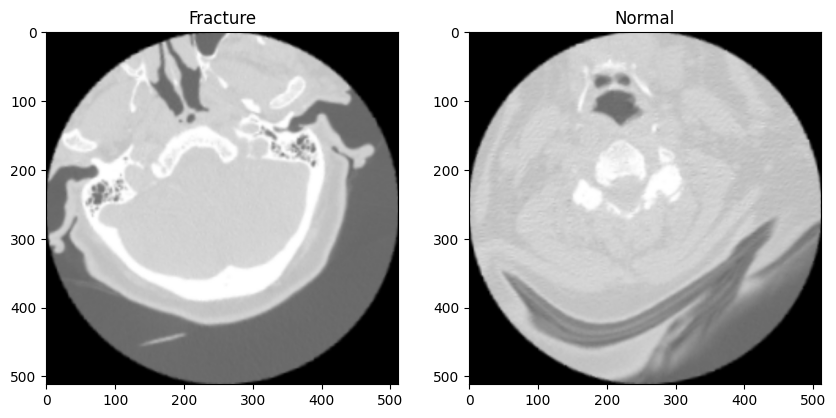

In [4]:
# Apply morphological transformations to enhance contrast

# Get the image 75th percentile
def get_75th_percentile(image):

    # Get the image histogram
    hist = cv.calcHist([image], [0], None, [256], [0, 256])

    # Get the 75th percentile
    sum = 0
    for i in range(len(hist)):
        sum = sum + hist[i]
        if sum >= 0.75 * image.size:
            return i

# Convert to grayscale
test_frac_gray = cv.cvtColor(test_frac, cv.COLOR_BGR2GRAY)
test_norm_gray = cv.cvtColor(test_norm, cv.COLOR_BGR2GRAY)

# Apply morphological transformations
test_frac_gray = cv.morphologyEx(test_frac_gray, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE, (get_75th_percentile(test_frac_gray), get_75th_percentile(test_frac_gray))))
test_norm_gray = cv.morphologyEx(test_norm_gray, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE, (get_75th_percentile(test_norm_gray), get_75th_percentile(test_norm_gray))))

# Enchanve contrast (CLAHE)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

test_frac_gray = clahe.apply(test_frac_gray)
test_norm_gray = clahe.apply(test_norm_gray)


# PLOT IMAGES (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(test_frac)
ax[0].set_title("Fracture")
ax[1].imshow(test_norm)
ax[1].set_title("Normal")

print(f"75th percentile of fracture image: {get_75th_percentile(test_frac_gray)}")
print(f"75th percentile of normal image: {get_75th_percentile(test_norm_gray)}")

Text(0.5, 1.0, 'Normal')

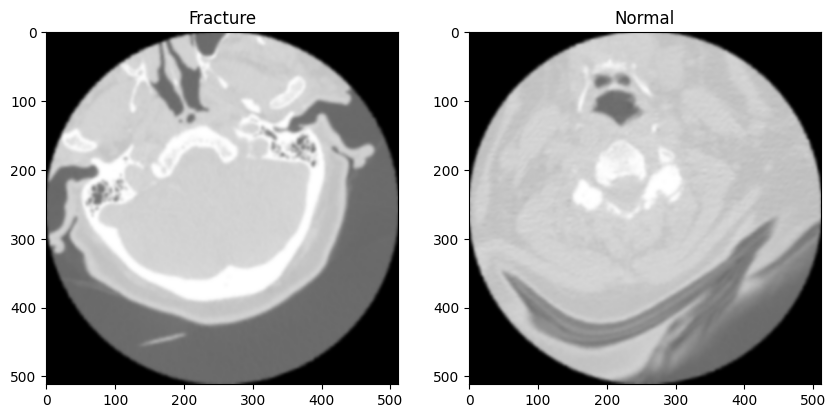

In [5]:
# Apply Gaussian blur to images
kernel = (7, 7)

# Apply Gaussian blur to fracture image
test_frac = cv.GaussianBlur(test_frac, kernel, 0)
# Apply Gaussian blur to normal image
test_norm = cv.GaussianBlur(test_norm, kernel, 0)

# PLOT IMAGES (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(test_frac)
ax[0].set_title("Fracture")
ax[1].imshow(test_norm)
ax[1].set_title("Normal")

Text(0.5, 1.0, 'Normal')

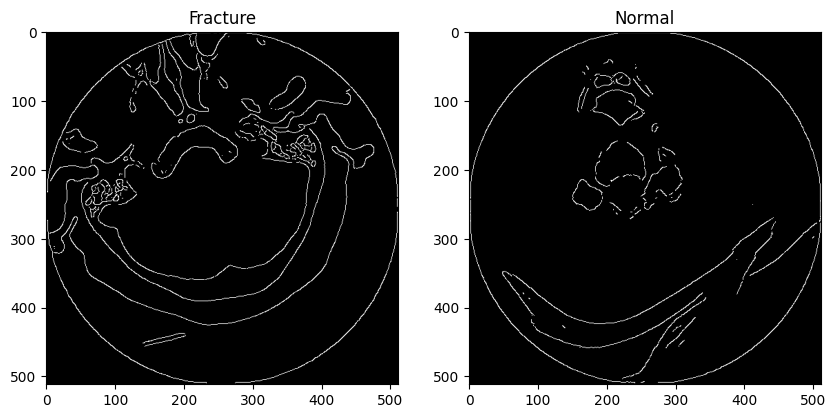

In [6]:
# Apply Canny Edge Detection to images
# Canny Edge Detection is a technique to extract useful structural information from different vision objects and dramatically reduce the amount of data to be processed.
a, b = 50, 50
# Apply Canny Edge Detection to fracture image
test_frac = cv.Canny(test_frac, a,b)
# Apply Canny Edge Detection to normal image
test_norm = cv.Canny(test_norm, a,b)

# PLOT IMAGES (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(test_frac, cmap="gray")
ax[0].set_title("Fracture")
ax[1].imshow(test_norm, cmap="gray")
ax[1].set_title("Normal")


## APPLY IMAGEE TRANSFORMATIONS AND FEATURE SELECTION TO THE IMAGES

In [ ]:
# FUNCTION TO PROCESS IMAGES